In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##Homework #1

<b>5.)</b> Let $X_1 , . . . , X_n$ be a sample (i.i.d.) from a distribution function, $F$, and let $F_n$
denote the ecdf. Show that

$$\text{Cov} [F_n (u), F_n (v)] = \frac 1 n [F(m) − F(u)F(v)]$$

where m = min(u, v). 

$$\text{Cov} [F_n (u), F_n (v)] = \mathbb{E}[F_n (u) F_n (v)] - \mathbb{E}[F_n(u)] \mathbb{E}
[F_n(v)]$$

$$= \mathbb{E} \left[ \frac 1 {n^2} \sum_{i,j} \mathbb{I}_{(-\infty, u]} (X_i)\mathbb{I}_{(-\infty, v]}(X_j) \right] - F(u)F(v)$$

$$= \frac 1 {n^2} \sum_{i,j} \left[ \mathbb{E} \{\mathbb{I}_{(-\infty, u]} (X_i)\mathbb{I}_{(-\infty, v]}(X_j) \} - F(u)F(v) \right]$$

$$ = \frac 1 {n^2} \sum_{i,j} \left[\mathbb{P}(X_i \leq u ~~~ \text{and} ~~~~ X_j \leq v) - F(u)F(v) \right]$$

$$ = \frac 1 {n^2} \sum_{i= j} \left[\mathbb{P}(X_i \leq u ~~~ \text{and} ~~~~ X_j \leq v) - F(u)F(v) \right]
+\frac 1 {n^2} \sum_{i \neq j} \left[\mathbb{P}(X_i \leq u ~~~ \text{and} ~~~~ X_j \leq v) - F(u)F(v) \right]
$$

$$ = \frac 1 {n^2} \sum_i [F(m) - F(u)F(v)] + 0$$

Where the second term is zero because of independence. And therefore, 

$$\text{Cov} [F_n (u), F_n (v)] = \frac 1 n [F(m) − F(u)F(v)]$$

Conclude that $F_n (u)$ and $F_n (v)$ are positively correlated:
If $F_n (u)$ overshoots $F(u)$, then $F_n (v)$ will tend to overshoot $F(v)$.

Because F(x) is less than or equal to one, the covariance will either be zero or positive. This means they are positively correlated. To explain it a little more clearly, we suppose, without any loss of generality that u is less than v, therefore, we can write the covariance as

$$\frac {F(u)} n [1 − F(v)]$$

and because F(v) is less than or equal to one, the above expression cannot be negative.

<b>6.)</b> Various chemical tests were conducted on beeswax by White, Riethof, and
Kushnir (1960). In particular, the percentage of hydrocarbons in each sample
of wax was determined.

a.) Plot the ecdf, a histogram, and a normal probability plot of the percentages of
hydrocarbons given in the following table. Find the .90, .75, .50, .25, and .10
quantiles. Does the distribution appear Gaussian?

In [19]:
data = array([ 14.27,  15.15,  13.98,  15.4 ,  14.04,  14.1 ,  13.75,  14.23,
        14.8 ,  13.98,  14.47,  14.68,  13.68,  15.47,  14.87,  14.44,
        12.28,  14.9 ,  14.65,  13.33,  15.31,  13.73,  15.28,  14.57,
        17.09,  15.91,  14.73,  14.41,  14.32,  13.65,  14.43,  15.1 ,
        14.52,  15.18,  14.19,  13.64,  15.02,  13.96,  12.92,  15.63,
        14.49,  15.21,  14.77,  14.01,  14.57,  15.56,  13.83,  14.56,
        14.75,  14.3 ,  14.92,  15.49,  15.38,  13.66,  15.03,  14.41,
        14.62,  15.47,  15.13])

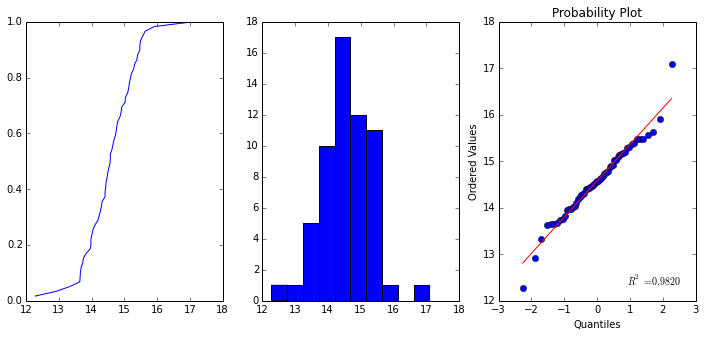

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as stats   
ecdf = ECDF(data)
figsize(12,5)
subplot(131)
plot(ecdf.x, ecdf.y);
subplot(132)
hist(data);
subplot(133)
stats.probplot(data, dist="norm", plot=pylab);

In [28]:
np.percentile(data,[90, 75, 50, 25,10 ])

array([ 15.47 ,  15.115,  14.57 ,  14.07 ,  13.676])

I would say it appears to be somewhat Gaussian.

b.) The average percentage of hydrocarbons in microcrystalline wax (a synthetic
commercial wax) is 85%. Suppose that beeswax was diluted with 1% microcrystalline wax. Could this be detected? What about a 3% or a 5% dilution?
(Such questions were one of the main concerns of the beeswax study.)

This would need an analysis of variance to be sure, but a quick numeric check leads me to believe that a 1% dilution would be undetectable, but a 5% dilution would be detectable. The 3% dilution seems to be at the border between detectable and not detectible. 

<b>10.)</b> Let $X_1 , . . . , X_n$ be a sample from cdf F and denote the order statistics by
$X_{(1)} , X_{(2)} , . . . , X_{(n)}$ . We will assume that F is continuous, with density func-
tion f . From Theorem A in Section 3.7, the density function of $X_{(k)}$ is

$$f_k (x) = n {n-1 \choose k -1} [F(x)]^{ k−1} [1 − F(x)]^{ n−k }f (x)$$


a. Find the mean and variance of $X_{(k)}$ from a uniform distribution on [0, 1]. You
will need to use the fact that the density of $X_{(k)}$ integrates to 1. Show that

$$\text{Mean} = \frac k {n + 1}$$

$$\text{Variance} = \frac 1 {n + 2} (\frac k {n + 1})(1 − \frac k {n + 1})$$

<b>Solution:</b>

$$\mathbb{E}[X] = \int x n {n-1 \choose k-1} x^{k-1}(1-x)^{n-k} dx$$

Let $\lambda = k+1$ and $m = n +1$, then we can rewrite the above expression:

$$ \mathbb{E}[X] = \frac {\lambda -1} m \int m {m-1 \choose \lambda-1} x^{\lambda-1}(1-x)^{m-\lambda} dx$$

The part under the integral, integrates to 1, and then back substituting, yields

$$\text{Mean} = \frac k {n + 1}$$

Similarily, we find

$$\mathbb{E}[X^2] = \frac {k(k+1)}{(n+1)(n+2)}$$

Therefore,

$$\text{Var} = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 = \frac {k(k+1)}{(n+1)(n+2)} - (\frac k {n + 1})^2$$

and after some algebra, we are left with

$$\text{Variance} = \frac 1 {n + 2} (\frac k {n + 1})(1 − \frac k {n + 1})$$

b. Find the approximate mean and variance of $Y_{ (k)}$ , the kth-order statistic of a
sample of size n from F. To do this, let

$$X_i = F(Y_i )$$

or

$$Y_i = F^{ −1} (X_i )$$

The $X_i$ are a sample from a U [0, 1] distribution (why?). Use the propagation
of error formula,

$$Y_{(k)} = F^{ −1} (X_{(k)} )$$

$$≈ F^{ −1}(\frac k {n + 1})+ (X_{(k)} − \frac k {n + 1}) \frac d {dx} F^{-1} (x)|_{k/(n+1)}$$

and argue that

$$\mathbb{E} Y_{(k)} ≈ F^{ −1} (\frac k {n+1})$$

$$\text{Var} (Y_{(k)} ) ≈ \frac k {n + 1} \left(1 - \frac k {n + 1}\right) \frac 1 {( f\{F^{−1} [k/(n+1)]\})^2} \left(\frac 1 {n + 2}\right)$$

<b>Solution:</b>

$$\mathbb{E} Y_{(k)} = \mathbb{E} F^{ −1}(\frac k {n + 1})+ (X_{(k)} − \frac k {n + 1}) \frac d {dx} F^{-1} (x)|_{k/(n+1)}$$

$$= F^{ −1}(\frac k {n + 1})$$

because $\mathbb{E}(X_{(k)} − \frac k {n + 1}) = 0$.

For the variance, we can ignore all constants and therefore must only find

$$\text{Var} (X_{(k)} \frac d {dx} F^{-1} (x)|_{k/(n+1)}) = (\frac d {dx} F^{-1} (x)|_{k/(n+1)})^2 \text{Var} (X_{(k)}) = (\frac d {dx} F^{-1} (x)|_{k/(n+1)})^2 \frac 1 {n + 2} (\frac k {n + 1})(1 − \frac k {n + 1})$$

c. Use the results of parts (a) and (b) to show that the variance of the pth sample
quantile is approximately

$$\frac 1 {nf^2 (x_p )}p(1 − p)$$

where $x_p$ is the pth quantile.

d. Use the result of part (c) to find the approximate variance of the median of a
sample of size n from a N (μ, σ 2 ) distribution. Compare to the variance of the
sample mean.

<b>11.)</b> Calculate the hazard function for


$$F(t) = 1 − e^{ −αt^{\beta}} , ~~~~~~~~~~ t ≥ 0$$

The hazard function is defined as

$$h(t) = - \frac d {dt} log (1- F(t))$$

Therefore,

$$h(t)= \frac d {dt} (- \alpha t^{\beta} ) = - \alpha \beta t^{\beta-1}$$

<b>15.)</b> A prisoner is told that he will be released at a time chosen uniformly at random
within the next 24 hours. Let T denote the time that he is released. What is the
hazard function for T ? For what values of t is it smallest and largest? If he has
been waiting for 5 hours, is it more likely that he will be released in the next few
minutes than if he has been waiting for 1 hour?

$$h(t) = - \frac d {dt} log (1- F(t)) = - \frac d {dt} log (1 - t/24) = \frac 1 {(24 - t)}$$

The hazard function is largest and smallest at the two endpoints of the 24 hours.

The longer he waits the more likely it is that he will be released.

<b>29.)</b> 
Of the 26 measurements of the heat of sublimation of platinum, 5 are outliers
(see Figure 10.10). Let N denote the number of these outliers that occur in a
bootstrap sample (sample with replacement) of the 26 measurements.

a. Explain why the distribution of N is binomial.

It's binomial because there is only two options: outlier / not-outlier. And because we are sampling with replacement there is a certain probability of each choice to be either a success or not.

b. Find P(N ≥ 10).

In [49]:
from scipy.stats import binom
1 - binom.cdf(9,26,5/26)

0.017876217119130344

c. In 1000 bootstrap samples, how many would you expect to contain 10 or more
of these outliers? Additionally run a bootstrap to compare.

Apparently, from above, we should expect something like 17.8 to contain 10 or more

In [47]:
sample = [0 for i in range(26)]
sample[0:5] = [1 for i in range(5)]
out = 0
for i in range(1000):
    if(sum(np.random.choice(sample,26))>9):
        out += 1
print(out)

16


d. What is the probability that a bootstrap sample is composed entirely of these
outliers?

In [55]:
binom.cdf(0,26,21/26)

2.4205444679400115e-19